In [1]:
#pip install vk_api

In [2]:
pip install vk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install transliterate

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install torch

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: jinja2 in c:\programdata\anaconda3\lib\site-packages (from torch) (2.11.3)



In [7]:
pip install umap

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install hdbscan

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install nb_black

Note: you may need to restart the kernel to use updated packages.


In [10]:
import vk
import time
import pandas as pd

import json
import requests
import folium
import math
import datetime as dt
import os
import re
import random
import pymorphy2
import urllib

import warnings

warnings.filterwarnings("ignore")

pd.options.display.max_colwidth = 1000
from datetime import datetime, date
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
from transliterate import translit
from numpy import mean, std, var

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

import re
import string
from nltk.corpus import stopwords
import nltk
from pymystem3 import Mystem
from string import punctuation
from wordcloud import WordCloud
import ast
from scipy.stats.contingency import margins
from transformers import pipeline, AutoTokenizer, AutoModel
import torch
import transformers
import umap
import hdbscan
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
import logging

logging.captureWarnings(True)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Data parsing

In [11]:
# vk_api = vk.API(
#     access_token="vk1.a.eJNAwbeY3rLH2B8tTLlhg_q2AwyLM1m9VasVbfWs1wkdXDA8GR1ebwQduE5cYdenlPbmMxAjSwwd-mGdUVHBUQKwb8JZVd86QBgU9IsOYYmBQP_KKUEjmsHMDLZScEtATXYoJ4nBki7YXX0s6goyVWWva18TOkLIuZuSFM17eun7WYpWypFYaFT0GMopAgU0"
# )
vk_api = vk.API(
    access_token="vk1.a.K1MtbuSo2VXLTRbD57CORalIq1rbG68HAeQTmqoTWr3sV94p4UaSPkPHRwpe5kJu0AzwRn62RfR9H7pPWXGLkL7GoHwpPThsqdZZ6X1sftx3VtamxAYpSZzI57Kmf6wGC-8RjAaOygWheNM8owPt8ZS-OzOcAVV3dTaAIw7zR6r24U_Aue46qtJpLDcE8w_nOqVQO0Qa8xAjFl4ahFhlUg"
)

<IPython.core.display.Javascript object>

In [12]:
list_of_groups = vk_api.groups.getById(
    v=5.131,
    group_ids=[
        "club206281475",
        "secrety_05",
        "mahahkala",
        "atypicalmakhachkala",
        "podsluxanopytigorsk",
        "ksdovolsik",
    ],
    fields="description",
)

<IPython.core.display.Javascript object>

In [13]:
list_of_ids_groups = []
for i in range(len(list_of_groups)):
    list_of_ids_groups.append(list_of_groups[i]["id"])

<IPython.core.display.Javascript object>

In [14]:
list_of_ids_groups1 = list_of_ids_groups[:5]
list_of_ids_groups2 = list_of_ids_groups[5:]

<IPython.core.display.Javascript object>

In [15]:
time.sleep(3)
df_escooter_1 = pd.DataFrame()
for i in range(len(list_of_ids_groups1)):
    posts1 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups1[i],
        query="электросамокат",
        owners_only=1,
        count=100,
    )
    df_1 = pd.json_normalize(posts1["items"])
    df_escooter_1 = pd.concat([df_1, df_escooter_1])

<IPython.core.display.Javascript object>

In [16]:
time.sleep(3)
df_escooter_2 = pd.DataFrame()
for i in range(len(list_of_ids_groups2)):
    posts2 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups2[i],
        query="электросамокат",
        owners_only=1,
        count=100,
    )
    df_2 = pd.json_normalize(posts2["items"])
    df_escooter_2 = pd.concat([df_2, df_escooter_2])

<IPython.core.display.Javascript object>

In [17]:
time.sleep(3)
df_kicksharing_1 = pd.DataFrame()
for i in range(len(list_of_ids_groups1)):
    posts3 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups1[i],
        query="кикшеринг",
        owners_only=1,
        count=100,
    )
    df_3 = pd.json_normalize(posts3["items"])
    df_kicksharing_1 = pd.concat([df_3, df_kicksharing_1])

<IPython.core.display.Javascript object>

In [18]:
time.sleep(3)
df_kicksharing_2 = pd.DataFrame()
for i in range(len(list_of_ids_groups2)):
    posts4 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups2[i],
        query="кикшеринг",
        owners_only=1,
        count=100,
    )
    df_4 = pd.json_normalize(posts4["items"])
    df_kicksharing_2 = pd.concat([df_4, df_kicksharing_2])

<IPython.core.display.Javascript object>

In [19]:
time.sleep(3)
df_rent_1 = pd.DataFrame()
for i in range(len(list_of_ids_groups1)):
    posts5 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups1[i],
        query="аренда самокат",
        owners_only=1,
        count=100,
    )
    df_5 = pd.json_normalize(posts5["items"])
    df_rent_1 = pd.concat([df_5, df_rent_1])

<IPython.core.display.Javascript object>

In [20]:
time.sleep(3)
df_rent_2 = pd.DataFrame()
for i in range(len(list_of_ids_groups2)):
    posts6 = vk_api.wall.search(
        v=5.131,
        owner_id=-list_of_ids_groups2[i],
        query="аренда самокат",
        owners_only=1,
        count=100,
    )
    df_6 = pd.json_normalize(posts6["items"])
    df_rent_2 = pd.concat([df_6, df_rent_2])

<IPython.core.display.Javascript object>

In [21]:
df_rent_1["query"] = "аренда самокат"
df_rent_2["query"] = "аренда самокат"
df_kicksharing_1["query"] = "кикшеринг"
df_kicksharing_2["query"] = "кикшеринг"
df_escooter_1["query"] = "электросамокат"
df_escooter_2["query"] = "электросамокат"

<IPython.core.display.Javascript object>

In [22]:
df_posts = pd.concat(
    [
        df_rent_1,
        df_rent_2,
        df_kicksharing_1,
        df_kicksharing_2,
        df_escooter_1,
        df_escooter_2,
    ]
)

<IPython.core.display.Javascript object>

In [23]:
df_posts = df_posts.drop_duplicates(subset="id")

<IPython.core.display.Javascript object>

In [24]:
df_posts.to_csv("df_posts.csv", index=False)

<IPython.core.display.Javascript object>

In [25]:
list_of_id_lists = []
for i in range(len(list(df_posts.owner_id.unique()))):
    list_of_id_lists.append(
        list(
            df_posts[df_posts["owner_id"] == list(df_posts.owner_id.unique())[i]]["id"]
        )
    )

<IPython.core.display.Javascript object>

In [26]:
list_of_owner_ids = list(df_posts.owner_id.unique())

<IPython.core.display.Javascript object>

In [27]:
df1 = pd.DataFrame()
df3 = pd.DataFrame()
for i in range(len(list_of_owner_ids)):
    for j in range(len(list_of_id_lists[i])):
        time.sleep(3)
        get_comments = vk_api.wall.getComments(
            v=5.131,
            owner_id=list_of_owner_ids[i],
            post_id=list_of_id_lists[i][j],
            need_likes=1,
            count=100,
            preview_length=0,
            extended=1,
            thread_items_count=10,
            fields=["bdate", "city", "home_town"],
        )
        df2 = pd.json_normalize(get_comments["items"])
        df4 = pd.json_normalize(get_comments["profiles"])
        df1 = pd.concat([df1, df2])
        df3 = pd.concat([df3, df4])

<IPython.core.display.Javascript object>

In [28]:
df1.to_csv("comments.csv", index=False)

<IPython.core.display.Javascript object>

In [29]:
df3.to_csv("people.csv", index=False)

<IPython.core.display.Javascript object>

In [30]:
comments = pd.read_csv("comments.csv")

<IPython.core.display.Javascript object>

In [31]:
df_threads = pd.DataFrame()
for i in comments["thread.items"].index:
    thread = ast.literal_eval(comments["thread.items"][i])
    df_thred = pd.json_normalize(thread)
    df_threads = pd.concat([df_thred, df_threads])

<IPython.core.display.Javascript object>

In [32]:
df_threads = df_threads.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [33]:
df_threads = df_threads[1770:]

<IPython.core.display.Javascript object>

In [34]:
df_threads = df_threads.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [35]:
df_threads = df_threads[802:]
df_threads = df_threads.reset_index(drop=True)

<IPython.core.display.Javascript object>

In [36]:
df_threads.to_csv("df_threads.csv", index=False)

<IPython.core.display.Javascript object>

In [38]:
df_threads_ = pd.DataFrame()
for i in range(len(df_threads["id"])):
    time.sleep(3)
    get_comments = vk_api.wall.getComment(
        v=5.131,
        owner_id=df_threads["owner_id"][i],
        comment_id=df_threads["id"][i],
        extended=1,
        fields=["bdate", "city", "home_town"],
    )
    df_threads_1 = pd.json_normalize(get_comments["profiles"])
    df_threads_ = pd.concat([df_threads_, df_threads_1])

<IPython.core.display.Javascript object>

In [39]:
df_threads_.to_csv("people_threads_part3.csv", index=False)
df_threads_.to_csv("people_threads_part2.csv", index=False)
df_threads_.to_csv("people_threads_part2.csv", index=False)

<IPython.core.display.Javascript object>

In [40]:
posts = pd.read_csv("df_posts.csv")
comments = pd.read_csv("comments.csv")
people = pd.read_csv("people.csv")
threads = pd.read_csv("df_threads.csv")
people_threads = pd.read_csv("df_threads.csv")

<IPython.core.display.Javascript object>

In [41]:
for i in [posts, comments, people, threads, people_threads]:
    print(i.shape)

(5, 29)
(162, 18)
(75, 10)
(0, 14)
(0, 14)


<IPython.core.display.Javascript object>

## Describe a social portrait of people commenting on kicksharing posts in VK publics

In [42]:
# concatenating information about the main commentators + commentators from the thread
all_people = pd.concat([people, people_threads])
all_people = all_people[~all_people.last_name.isna()]
all_people.drop_duplicates(inplace=True)
# remove deleted and blocked users
all_people = all_people[~all_people.deactivated.isin(["banned", "deleted"])]
# there are several problems with age – missing data and the absence of a year in the data
# let's take the minimum age value in terms of the number of characters and filter out those who have age data
all_people_with_age = all_people[
    all_people.bdate.apply(lambda x: len(str(x))) >= len("7.1.1985")
]
#  find those who have no age or it is without a year
all_people_without_age = all_people[
    all_people.bdate.apply(lambda x: len(str(x))) < len("7.1.1985")
]

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'Возраст, в годах')]

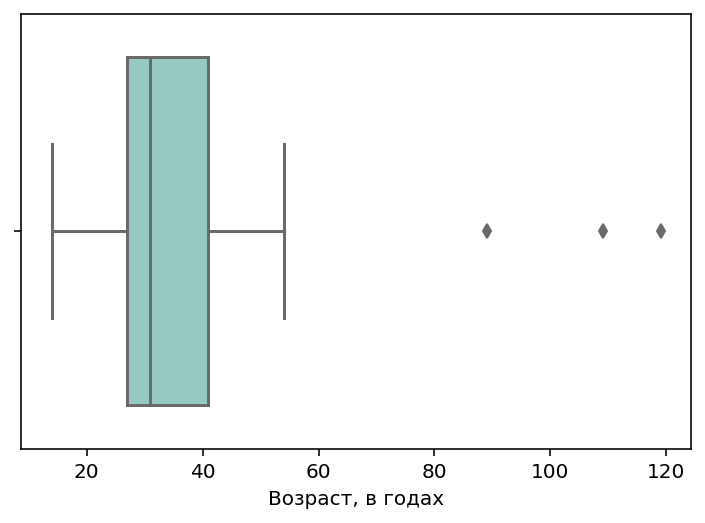

<IPython.core.display.Javascript object>

In [43]:
age_list = list(all_people_with_age.bdate)
# Since the age format is str, it needs to be converted to datetime.
for i in range(len(age_list)):
    if (age_list[i].find(".") == 1) & (
        age_list[i].find(".", age_list[i].find(".") + 1) == 3
    ):
        age_list[i] = "0" + age_list[i]
        age_list[i] = age_list[i][:3] + "0" + age_list[i][3:]

    if (age_list[i].find(".") == 1) & (
        age_list[i].find(".", age_list[i].find(".") + 1) == 4
    ):
        age_list[i] = "0" + age_list[i]

    if (age_list[i].find(".") == 2) & (
        (age_list[i].find(".", age_list[i].find(".") + 1)) == 4
    ):
        age_list[i] = age_list[i][:3] + "0" + age_list[i][3:]

    if (age_list[i].find(".") == 1) & (
        age_list[i].find(".", age_list[i].find(".") + 1) == 4
    ):
        age_list[i] = "0" + age_list[i]

all_people_with_age.insert(loc=1, column="age", value=age_list)

all_people_with_age["age_len"] = all_people_with_age.age.apply(lambda x: len(str(x)))
all_people_with_age.age = all_people_with_age.age.apply(
    lambda x: datetime.strptime(x, "%d.%m.%Y")
)


def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


all_people_with_age["age_years"] = all_people_with_age.age.apply(
    lambda x: calculate_age(x)
)
all_people_with_age = all_people_with_age.reset_index(drop=True)
sns.boxplot(all_people_with_age["age_years"], palette="Set3").set(
    xlabel="Возраст, в годах"
)

In [44]:
# The graph shows that there are outliers in the data.
# Let's apply the z-criteria in order to identify the index of people with an outlier age.
z = np.abs(stats.zscore(all_people_with_age["age_years"]))
threshold = 3
outliers_age = list((np.where(z > 3))[0])

# Let's remove outliers from the data and calculate the median
all_people_with_age_without_outliers = all_people_with_age[
    ~all_people_with_age.index.isin(outliers_age)
]
print(f"Median age is {all_people_with_age_without_outliers.age_years.median()}")

Median age is 30.0


<IPython.core.display.Javascript object>

In [45]:
# Replace the age of people with the age-outlier by the median and calculate the median for all people with age
all_people_with_age.loc[
    outliers_age, "age_years"
] = all_people_with_age_without_outliers.age_years.median()
print(f"Median age for people with age is {all_people_with_age.age_years.median()}")

Median age for people with age is 30.0


<IPython.core.display.Javascript object>

In [46]:
print(all_people_with_age.age_years.describe())

count    33.000000
mean     33.636364
std      13.390337
min      14.000000
25%      27.000000
50%      30.000000
75%      33.000000
max      89.000000
Name: age_years, dtype: float64


<IPython.core.display.Javascript object>

In [47]:
# get the final dataset with the correct age for all users
all_people_without_age["age_years"] = all_people_with_age.age_years.median()
all_people_clear_age = pd.concat([all_people_without_age, all_people_with_age])
all_people_clear_age.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

### Age distribution

In [58]:
people_final["age_years"] = people_final["age_years"].apply(lambda x: int(x))

NameError: name 'people_final' is not defined

<IPython.core.display.Javascript object>

In [ ]:
mean = people_final["age_years"].mean()
print(f"Mean age is {mean}")

In [ ]:
median = people_final["age_years"].median()
print(f"Median age is {median}")

In [ ]:
mode = people_final["age_years"].mode()
print(f"Mode age is {mode[0]}")

In [ ]:
print(f'Variance is {var(people_final["age_years"])}')

In [ ]:
print(f'Standart deviation is {std(people_final["age_years"])}')

Therefore, the average age of users is within 38 +- 9.1 * 3

In [ ]:
RQ = people_final["age_years"].describe()[6] - people_final["age_years"].describe()[4]
RQ

*RQ is 0, the age data is homogeneous*

In [ ]:
std(people_final["age_years"]) / people_final["age_years"].mean()

*Since the coefficient of variation does not exceed 30-35%, the age data are highly homogeneous.*

In [ ]:
sns.boxplot(people_final["age_years"]).set(xlabel="Возраст, в годах")

In [ ]:
# Let's look at the statistics on data in which omissions and dates of birth were removed without specifying the year

In [ ]:
all_people_with_age["age_years"] = all_people_with_age["age_years"].apply(
    lambda x: int(x)
)

In [ ]:
mean2 = all_people_with_age["age_years"].mean()
print(f"Mean age is {mean2}")

In [ ]:
median2 = all_people_with_age["age_years"].median()
print(f"Median age is {median2}")

In [ ]:
mode2 = all_people_with_age["age_years"].mode()
print(f"Mode age is {mode2[0]}")

In [ ]:
print(f'Variance is {var(all_people_with_age["age_years"])}')

In [ ]:
print(f'Standart deviation is {std(all_people_with_age["age_years"])}')

*Therefore, the average age of users is within 40 +- 13.6 * 3*

In [ ]:
RQ = (
    all_people_with_age["age_years"].describe()[6]
    - all_people_with_age["age_years"].describe()[4]
)
RQ  

In [ ]:
std(all_people_with_age["age_years"]) / all_people_with_age["age_years"].mean()

*Since the coefficient of variation does not exceed 30-35%, the age data still have a high uniformity.*

In [ ]:
sns.boxplot(all_people_with_age["age_years"], palette="pastel").set(
    xlabel="Возраст, в годах"
)

### City distribution

In [ ]:
pd.DataFrame(people_final["city"].value_counts(normalize=True).head(10))

*Since the city variable is measured on a nominal scale, mode is used as a measure of the central trend, and the spread measure is the coefficient of qualitative variation.*

In [ ]:
mode_city = people_final["city"].mode()[0]
print(f'Mode of the city is "{mode_city}"')

In [ ]:
# the coefficient of qualitative variation
n = 4709
k = 617
numerator = (2 * k) / (n ** 2 * (k - 1))

In [ ]:
city_list = list(np.array(people_final["city"].value_counts()))
reverse_list = city_list[::-1]
denominator = np.dot(city_list[:616][::-1], list(np.cumsum(reverse_list))[:616])

In [ ]:
numerator * denominator

**So, the coefficient of qualitative variationis 0.69. Thus, since the the coefficient of qualitative variation is close enough to 1, it means that from the point of view of the distribution by city, the data are heterogeneous.*

In [ ]:
# It is obvious that the distribution is heterogeneous due to filling in the gaps with a mode with the value "Moscow"
# Let's look at the statistics on the data in which the omissions were removed

In [ ]:
pd.DataFrame(df_city_["city"].value_counts(normalize=True).head(10))

In [ ]:
mode_city = df_city_["city"].mode()[0]
print(f'Mode is "{mode_city}"')

In [ ]:
# the coefficient of qualitative variation
n2 = 3477
k2 = 617
numerator2 = (2 * k2) / (n2 ** 2 * (k2 - 1))

In [ ]:
city_list2 = list(np.array(df_city_["city"].value_counts()))
reverse_list2 = city_list2[::-1]
denominator2 = np.dot(city_list2[:616][::-1], list(np.cumsum(reverse_list2))[:616])

In [ ]:
numerator2 * denominator2

So, the coefficient of qualitative variation is 0.84. Thus, since the coefficient of qualitative variation is close enough to 1, it means that from the point of view of gender distribution, the data became even more heterogeneous after the omissions were removed.

## Identify the most popular terms used in the discussion of the topic of kicksharing

In [ ]:
threads = threads.dropna(subset="text")


def comment_without_id(x):
    try:
        return x.split("],")[1]
    except:
        return x.split("],")[0]


threads.text = threads.text.apply(lambda x: comment_without_id(x))

threads = threads.dropna(subset="text")
threads = threads[threads.text != ""]

all_comments = pd.concat([comments, threads]).dropna(subset="text")
all_comments.text = all_comments.text.apply(lambda x: x.lower()).apply(
    lambda x: re.sub(r"\d+", "", x)
)
all_comments = all_comments.reset_index(drop=True)
all_comments["text_for_sentiment"] = (
    all_comments.text.apply(
        lambda x: x.translate(str.maketrans("", "", string.punctuation))
    )
    .apply(lambda x: x.strip().replace("\r\n", "\n").replace("\r", "\n"))
    .apply(lambda x: re.sub(r"\n", "", x))
)

mystem = Mystem()
russian_stopwords = stopwords.words("russian") + [
    "это",
    "хотеть",
    "делать",
    "начинать",
    "хотеться",
    "мочь",
    "который",
    "весь",
    "свой",
]


def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [
        token
        for token in tokens
        if token not in russian_stopwords
        and token != " "
        and token.strip() not in punctuation
        and token not in russian_stopwords
    ]

    text = " ".join(tokens)

    return text


def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)


all_comments.text = all_comments.text.apply(lambda x: preprocess_text(remove_emoji(x)))
all_comments = (
    all_comments[all_comments.text != ""].dropna(subset="text").reset_index(drop=True)
)
all_comments["text"] = all_comments["text"].apply(lambda x: str(x))
clean = all_comments["text"].values

In [ ]:
np.savetxt("text.txt", all_comments["text"].values, delimiter=" ", fmt="%s")

with open("clean_data.txt", "w") as output:
    output.write(str(clean)[2:-2])

with open("text.txt", "r", encoding="utf-8") as f:
    stop_words = f.read().split()

with open("text.txt", "r", encoding="utf-8") as f:
    words = f.read().split()

In [ ]:
words = [word.replace("'", "") for word in words]
words = list(filter(lambda x: x != "»", words))
words = list(filter(lambda x: x != "«", words))
data = Counter(words)

In [ ]:
background_color = "#101010"
height = 720
width = 1080

word_cloud = WordCloud(background_color=background_color, width=width, height=height)

word_cloud.generate_from_frequencies(data)

word_cloud.to_file("image_11.png")

In [ ]:
all_comments.to_csv("data_before_.csv", index=False)

## To determine the sentiment of messages about the kicksharing

In [ ]:
data = pd.read_csv("data_before_.csv")
data.shape

In [ ]:
model_checkpoint = "blanchefort/rubert-base-cased-sentiment"
classifier = pipeline("sentiment-analysis", model=model_checkpoint)

In [ ]:
data = data[data.text_for_sentiment.apply(lambda x: len(str(x))) < 512]
data.shape

In [ ]:
data['sentiment_analysis_value'] = data['text_for_sentiment'].apply(lambda x: classifier(x)[0]['label'])
data['sentiment_analysis_score'] = data['text_for_sentiment'].apply(lambda x: classifier(x)[0]['score'])
data.to_csv('data_with_sentiment.csv', index=False)

In [ ]:
data = pd.read_csv("data_with_sentiment.csv")
print(data.sentiment_analysis_value.value_counts())

## To identify whether the sentiment of the messages about the phenomenon depends on the tone of the news publication

In [ ]:
missing_posts = posts[posts.text.isna()]
missing_posts = missing_posts.dropna(subset="copy_history")

In [ ]:
df_missing_posts = pd.DataFrame()
for i in missing_posts["copy_history"].index:
    miss_post = ast.literal_eval(missing_posts["copy_history"][i])
    df_miss_post = pd.json_normalize(miss_post)
    df_missing_posts = pd.concat([df_miss_post, df_missing_posts])

In [ ]:
df_missing_posts = df_missing_posts.set_index(missing_posts.index)

In [ ]:
for i in missing_posts.index:
    posts.text[i] = df_missing_posts.text[i]

In [ ]:
posts = posts.dropna(subset="text")

In [ ]:
posts = posts.reset_index(drop=True)

In [ ]:
posts.text = posts.text.apply(lambda x: x.lower())
posts.text = posts.text.apply(lambda x: re.sub(r"\d+", "", x))
posts = posts.reset_index(drop=True)
posts.text = posts.text.apply(
    lambda x: x.translate(str.maketrans("", "", string.punctuation))
)
posts.text = posts.text.apply(
    lambda x: x.strip().replace("\r\n", "\n").replace("\r", "\n")
)
posts.text = posts.text.apply(lambda x: re.sub(r"\n", "", x))
posts.text = posts.text.apply(lambda x: re.sub(r"\n", "", x))
posts["text_for_sentiment"] = posts.text

In [ ]:
posts.to_csv('posts_for_sentiment.csv', index=False)

In [ ]:
posts = pd.read_csv("posts_for_sentiment.csv")

In [ ]:
posts["len_of_post"] = posts["text_for_sentiment"].apply(lambda x: len(x))

In [ ]:
sns.histplot(data=posts, x=posts["len_of_post"]).set(
    xlabel="Длина новостной публикации", ylabel="Количество постов"
)

In [ ]:
print(f'Median length of post {posts["len_of_post"].median()}')

In [ ]:
print(
    f'Percentage of posts with length less that 512 is {posts[posts["len_of_post"] < 512].shape[0] / posts.shape[0]}'
)

In [ ]:
posts = posts[posts.text_for_sentiment.apply(lambda x: len(x)) < 512]
posts['sentiment_analysis_value'] = posts['text_for_sentiment'].apply(lambda x: classifier(x)[0]['label'])
posts['sentiment_analysis_score'] = posts['text_for_sentiment'].apply(lambda x: classifier(x)[0]['score'])
posts.to_csv('posts_with_sentiment.csv', index=False)

In [ ]:
posts = pd.read_csv("posts_with_sentiment.csv")

In [ ]:
posts = posts.rename(
    columns={
        "sentiment_analysis_value": "sentiment_analysis_value_post",
        "sentiment_analysis_score": "sentiment_analysis_score_post",
    }
)

In [ ]:
print(posts.sentiment_analysis_value_post.value_counts())

In [ ]:
posts_with_sentiment_for_chi_square = posts[
    ["id", "sentiment_analysis_value_post", "sentiment_analysis_score_post"]
]
posts_with_sentiment_for_chi_square_fot_dict = posts_with_sentiment_for_chi_square.set_index(
    "id"
)
dict_posts = posts_with_sentiment_for_chi_square_fot_dict[
    "sentiment_analysis_value_post"
].to_dict()
dict_posts_score = posts_with_sentiment_for_chi_square_fot_dict[
    "sentiment_analysis_score_post"
].to_dict()

In [ ]:
data2 = data[
    data["post_id"].isin(posts_with_sentiment_for_chi_square.id.unique())
].reset_index(drop=True)
data2.post_id = data2.post_id.apply(lambda x: int(x))

In [ ]:
data = pd.read_csv("data_with_sentiment.csv")
data2["sentiment_post_value"] = data2.post_id.apply(lambda x: dict_posts[x])
data2["sentiment_post_score"] = data2.post_id.apply(lambda x: dict_posts_score[x])
crosstab1 = pd.crosstab(
    data2["sentiment_post_value"], data2["sentiment_analysis_value"]
)

In [ ]:
crosstab1

In [ ]:
stats.chi2_contingency(crosstab1)

In [ ]:
data2_without_neutral = data2[
    (data2["sentiment_post_value"] != "NEUTRAL")
    & (data2["sentiment_analysis_value"] != "NEUTRAL")
]

In [ ]:
crosstab_without_neutral = pd.crosstab(
    data2_without_neutral["sentiment_post_value"],
    data2_without_neutral["sentiment_analysis_value"],
)
crosstab_without_neutral

In [ ]:
stats.chi2_contingency(crosstab_without_neutral)

## To identify which factors contribute to the formation of opinions about kicksharing

In [ ]:
data = pd.read_csv("data_with_sentiment.csv")

In [ ]:
sentences = list(data.text_for_sentiment)
sentences_test1 = sentences[0:2000]
sentences_test2 = sentences[2000:4000]
sentences_test3 = sentences[4000:6000]
sentences_test4 = sentences[6000:8000]
sentences_test5 = sentences[8000:]

In [ ]:
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = (
        attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    )
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

In [ ]:
sentences = sentences_test5
tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_mt_nlu_ru")
model = AutoModel.from_pretrained("sberbank-ai/sbert_large_mt_nlu_ru")
encoded_input = tokenizer(sentences, padding=True, truncation=True, max_length=24, return_tensors='pt')
with torch.no_grad():
    model_output = model(**encoded_input)
sentence_embeddings5 = mean_pooling(model_output, encoded_input['attention_mask'])

In [ ]:
torch.save(sentence_embeddings5, 'embeddings1.pt')
torch.save(sentence_embeddings5, 'embeddings2.pt')
torch.save(sentence_embeddings5, 'embeddings3.pt')
torch.save(sentence_embeddings5, 'embeddings4.pt')
torch.save(sentence_embeddings5, 'embeddings5.pt')

In [ ]:
embeddings1 = torch.load("embeddings1.pt")
embeddings2 = torch.load("embeddings2.pt")
embeddings3 = torch.load("embeddings3.pt")
embeddings4 = torch.load("embeddings4.pt")
embeddings5 = torch.load("embeddings5.pt")

In [ ]:
embeddings_concated = torch.cat(
    [embeddings1, embeddings2, embeddings3, embeddings4, embeddings5]
)
embeddings_concated = torch.load("embeddings_concated.pt")

In [ ]:
def generate_clusters(message_embeddings, min_cluster_size, random_state=42):

    umap_embeddings = umap.UMAP(random_state=42).fit_transform(message_embeddings)

    clusters = hdbscan.HDBSCAN(
        min_cluster_size=min_cluster_size,
        metric="euclidean",
        cluster_selection_method="eom",
    ).fit(umap_embeddings)

    return clusters

In [ ]:
clusters_test = generate_clusters(
    message_embeddings=embeddings_concated, min_cluster_size=5, random_state=42
)
clusters_test.labels_
data = pd.read_csv("data_with_sentiment.csv")
data["cluster_id_test"] = clusters_test.labels_

In [ ]:
result_of_test_cluster = pd.DataFrame(data.cluster_id_test.value_counts().head(10))

In [ ]:
umap_embeddings = umap.UMAP(random_state=42).fit_transform(embeddings_concated)
hdb = hdbscan.HDBSCAN(gen_min_span_tree=True).fit(umap_embeddings)

param_dist = {
    "min_cluster_size": [2, 5, 7, 12, 15, 20, 25, 50, 100],
    "cluster_selection_method": ["eom", "leaf"],
    "metric": ["euclidean", "manhattan"],
}

# validity_scroer = "hdbscan__hdbscan___HDBSCAN__validity_index"
validity_scorer = make_scorer(hdbscan.validity.validity_index, greater_is_better=True)


grid_search = GridSearchCV(hdb, param_grid=param_dist, scoring=validity_scorer)

grid_search.fit(umap_embeddings)


print(f"Best Parameters {grid_search.best_params_}")
print(f"DBCV score :{grid_search.best_estimator_.relative_validity_}")

In [ ]:
clusters = generate_clusters(
    message_embeddings=embeddings_concated, min_cluster_size=2, random_state=42
)
clusters.labels_
data["cluster_id"] = clusters.labels_
data.to_csv("data_with_clusters.csv", index=False)
result_of_cluster = pd.DataFrame(data.cluster_id.value_counts().head(10))
result_of_cluster.to_excel("output10.xlsx")

In [ ]:
data_with_clusters = pd.read_csv("data_with_clusters.csv")

In [ ]:
data_with_clusters_interpretation = data_with_clusters[
    ["text_for_sentiment", "cluster_id"]
]

## To identify how the factor is related to opinions about kicksharing

In [ ]:
data_with_clusters_sentiment = data_with_clusters[
    data_with_clusters.cluster_id.isin(
        [820, 528, 901, 902, 1244, 1380, 939, 1207, 1017, 954, 945, 765, 687]
    )
]

In [ ]:
dict_cluster = {
    820: "Авария",
    528: "Штраф",
    901: "Власть",
    902: "Власть",
    1244: "ПДД",
    1380: "ПДД",
    939: "Инвентарь",
    1207: "Инфраструктура",
    1017: "Инфраструктура",
    954: "Инфраструктура",
    945: "Инфраструктура",
    765: "ПДД",
    687: "Опыт других стран",
}

In [ ]:
data_with_clusters_sentiment1 = data_with_clusters_sentiment[
    ["text_for_sentiment", "cluster_id", "sentiment_analysis_value"]
]

In [ ]:
data_with_clusters_sentiment1["cluster_name"] = data_with_clusters_sentiment1[
    "cluster_id"
].apply(lambda x: dict_cluster[x])

In [ ]:
data_with_clusters_sentiment1.cluster_name.value_counts()

In [ ]:
crosstab3 = pd.crosstab(
    data_with_clusters_sentiment1["cluster_name"],
    data_with_clusters_sentiment1["sentiment_analysis_value"],
)

In [ ]:
stats.chi2_contingency(crosstab3)

In [ ]:
def residuals(observed, expected):
    return (observed - expected) / np.sqrt(expected)

In [ ]:
expected = np.array(
    [
        [24.14840989, 22.16607774, 4.68551237],
        [17.99293286, 16.51590106, 3.49116608],
        [9.9434629, 9.12720848, 1.92932862],
        [33.14487633, 30.42402827, 6.43109541],
        [7.1024735, 6.51943463, 1.37809187],
        [23.67491166, 21.73144876, 4.59363958],
        [17.99293286, 16.51590106, 3.49116608],
    ]
)
F = np.array(crosstab3)

In [ ]:
a = residuals(F, expected)
resids = pd.DataFrame(a)
resids.to_excel("resids.xlsx")
expected1 = pd.DataFrame(expected)
expected1.to_excel("expected.xlsx")